# Classification algorithms

### Dataset description, visualisation, and pre-processing

<div class="alert alert-block alert-warning">The Heart Disease Detection dataset is composed of a set of characteristics used to determine if a patient has heart disease or not. Its main purpose is to perform classification based on the target variable, 'HeartDisease,' which indicates the presence of heart disease in the patient. This variable has integer values where 0 represents no disease and 1 indicates the presence of disease.
<div/>

<div class="alert alert-block alert-danger"> 
    
1. Import the Heart Disease Detection dataset.
2. Display and try to understand each feature in this dataset.
3. Display a summary of the dataset.
4. Verify if the dataset contains any missing values.
5. Plot the distribution of samples according to the target variable HeartDisease. Determine if the dataset is balanced.
6. Apply dummy encoding to all categorical features in the dataset.
7. Display the Pearson correlation matrix. Is there a correlation with the class and between features by considering a thresholed of 0.5?
8. Display the distribution of all features on all the scaled data (except binary features) using a histplot. What do you observe?
9. Split the data into a training and a testing set using a ratio of 0.3.
10. Normalize the data using z-score scaling.
<div/>

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("heart.csv")

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [221]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [222]:
print(df.columns)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [223]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [224]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

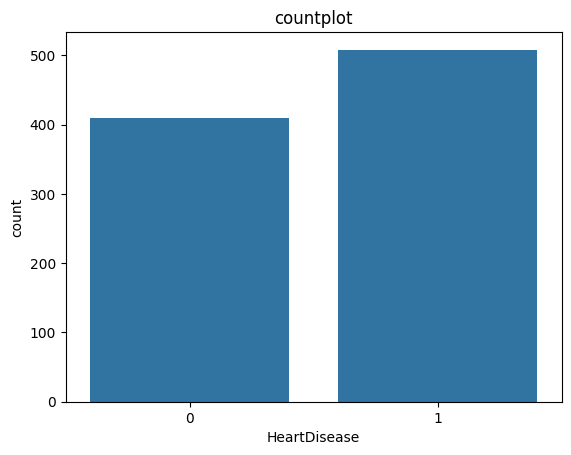

In [225]:
plt.title("countplot")
sns.countplot(x=data["HeartDisease"])
plt.show()

In [226]:
heart_disease_counts = df['HeartDisease'].value_counts()
print("Class distribution:\n", heart_disease_counts)
if min(heart_disease_counts) / sum(heart_disease_counts) < 0.4:
    print("The dataset is imbalanced.")
else:
    print("The dataset is balanced.")

Class distribution:
 HeartDisease
1    508
0    410
Name: count, dtype: int64
The dataset is balanced.


In [227]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_selector
categorical_selector = make_column_selector(dtype_include=['object', 'category'])
from sklearn.model_selection import train_test_split

# Apply the selector to the DataFrame to get column names
categorical = categorical_selector(df)

# Print the categorical column names
print(categorical)
onehot=OneHotEncoder()
ct=ColumnTransformer(transformers=[("onehot",OneHotEncoder(drop='first'),categorical)],remainder="passthrough")
df_transformed=ct.fit_transform(df)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [228]:
onehot_feature_names = ct.named_transformers_['onehot'].get_feature_names_out(categorical)


In [229]:
non_transformed_columns = [col for col in df.columns if col not in categorical]
new_column_names = list(onehot_feature_names) + non_transformed_columns

In [230]:
df_transformed = pd.DataFrame(df_transformed, columns=new_column_names)

<Axes: >

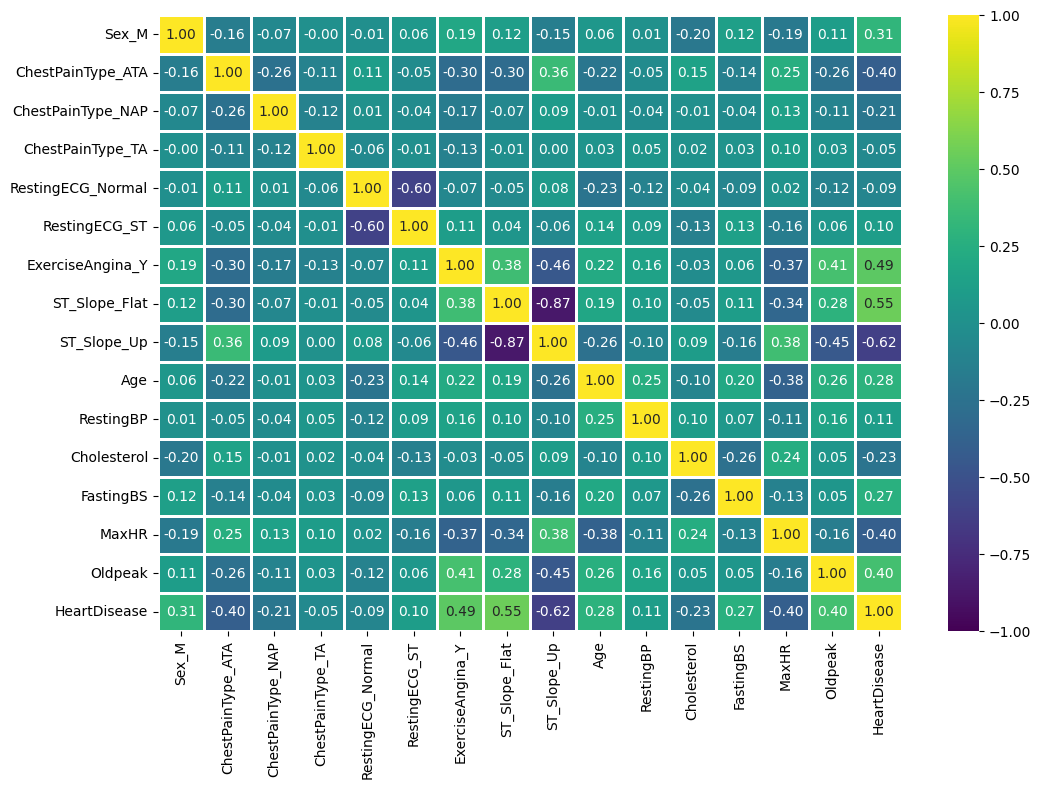

In [231]:
corrmatrix=df_transformed.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corrmatrix,cmap="viridis",annot=True,linewidths=2,fmt="0.2f",vmax=1,vmin=-1)

In [232]:
df_transformed.head()

,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,40.0,140.0,289.0,0.0,172.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,49.0,160.0,180.0,0.0,156.0,1.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,37.0,130.0,283.0,0.0,98.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,48.0,138.0,214.0,0.0,108.0,1.5,1.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,54.0,150.0,195.0,0.0,122.0,0.0,0.0


In [233]:
threshold = 0.5
strong_correlations = corrmatrix["HeartDisease"][abs(corrmatrix["HeartDisease"]) > threshold]

In [234]:
print(strong_correlations)

ST_Slope_Flat    0.554134
ST_Slope_Up     -0.622164
HeartDisease     1.000000
Name: HeartDisease, dtype: float64


In [235]:
non_binary=[]
binary=[]
for col in df_transformed.columns:
    if df_transformed[col].nunique() <= 2:
        binary.append(col) 
    else:
        non_binary.append(col)

In [236]:
print(non_binary)

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


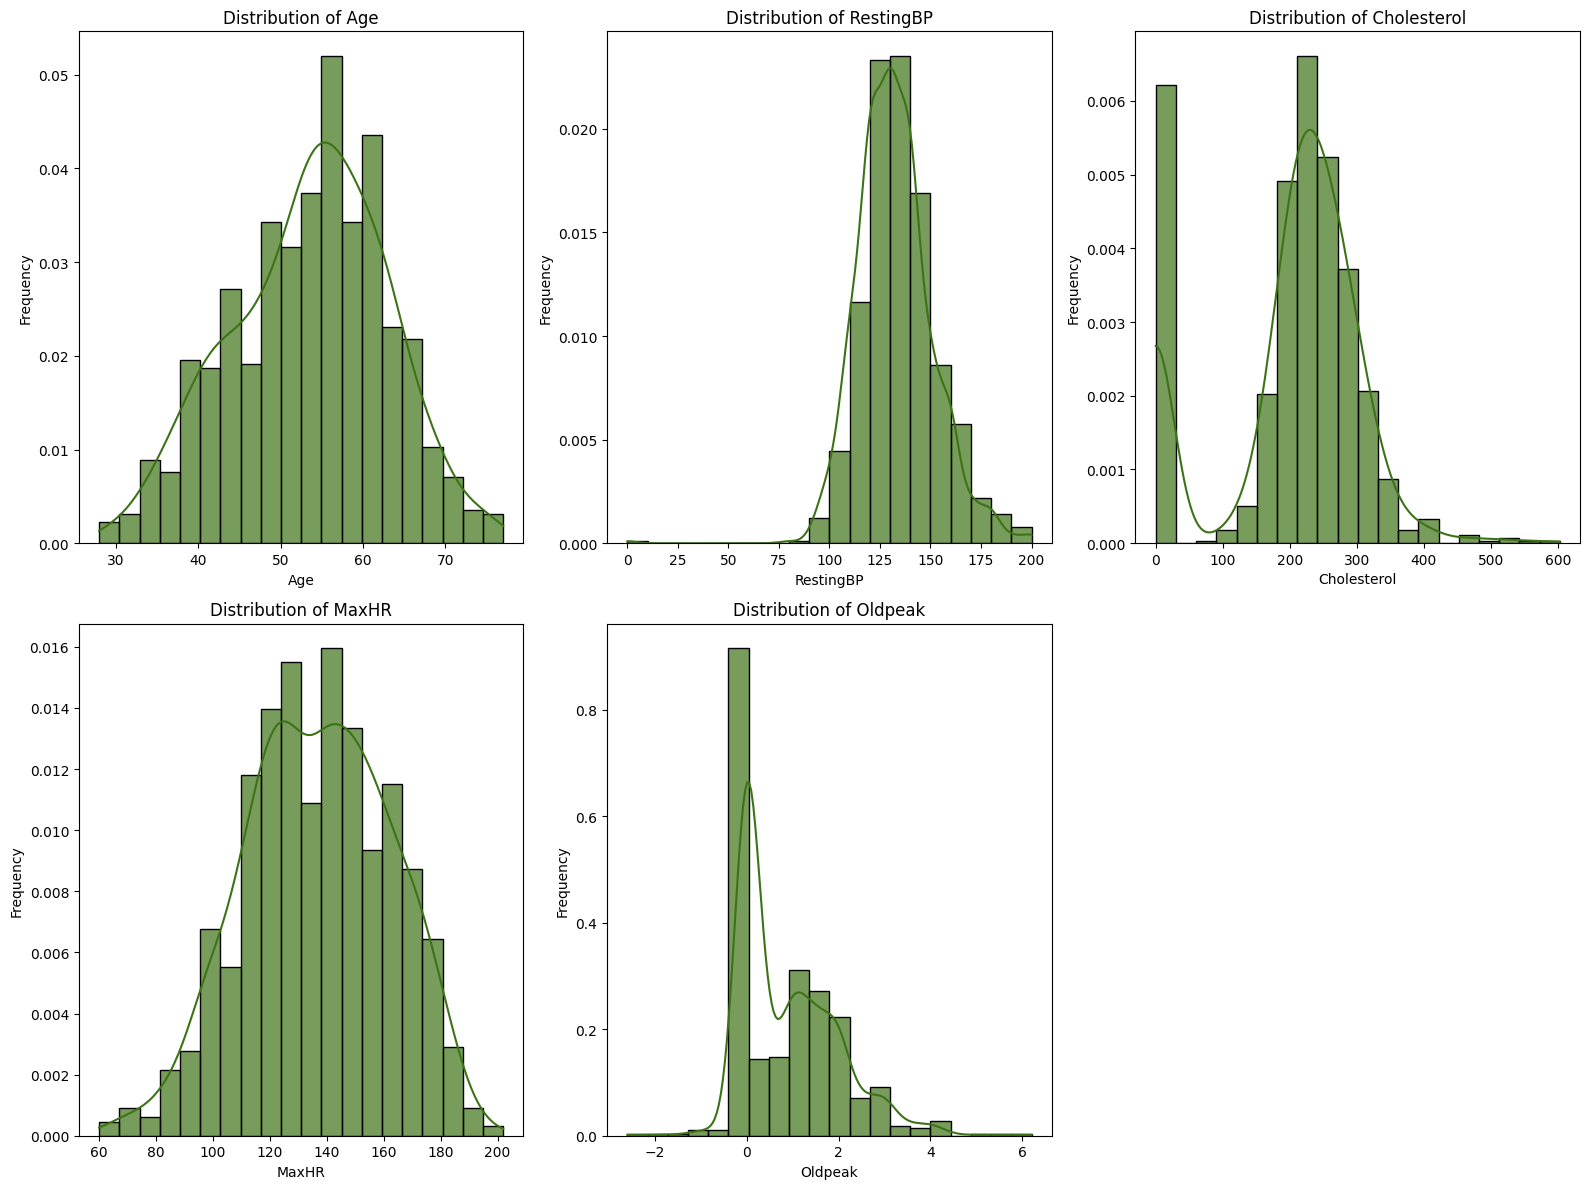

In [237]:

# Plot the distribution of each non-binary feature
plt.figure(figsize=(16, 12))
for i, feature in enumerate(non_binary,start=1):
    plt.subplot((len(non_binary) // 3) + 1, 3, i)
    sns.histplot(df[feature], kde=True, bins=20, color='#3D7317',stat='density',alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()

In [238]:
X = df_transformed.drop(columns=['HeartDisease'])  
y = df_transformed['HeartDisease'] 

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the sizes of the splits
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (642, 15)
Testing features shape: (276, 15)
Training target shape: (642,)
Testing target shape: (276,)


In [240]:
scaler= StandardScaler()
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)

In [241]:
# Convert the scaled data back to a DataFrame for better visualization
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display the first few rows of the scaled training data
X_train_scaled_df.head()

,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,0.544949,-0.489267,-0.520852,-0.209529,0.817027,-0.494152,-0.830346,-1.025241,1.158907,0.464714,-1.772314,0.294989,-0.525682,0.774609,-0.729460
1,0.544949,-0.489267,-0.520852,-0.209529,0.817027,-0.494152,1.204318,-1.025241,-0.862882,0.781767,-1.234868,-1.905390,1.902289,-1.173673,0.990283
2,0.544949,-0.489267,1.919930,-0.209529,-1.223950,-0.494152,1.204318,0.975381,-0.862882,-0.063707,1.452358,-1.905390,1.902289,-0.605424,-0.819972
3,0.544949,-0.489267,-0.520852,-0.209529,0.817027,-0.494152,1.204318,0.975381,-0.862882,0.993136,1.452358,0.257376,1.902289,-1.295440,0.085155
4,0.544949,-0.489267,-0.520852,-0.209529,-1.223950,-0.494152,1.204318,-1.025241,1.158907,0.993136,-0.159978,1.197709,1.902289,-0.199532,0.809258


### Data training and performance evaluation

<div class="alert alert-block alert-danger"> 
    
1. Train the following algorithms on the generated training dataset: Gaussian Naive Bayes, KNN(K=3), and decision tree (max_depth=6).
2. Display and save the tree generated by the decision tree algorithm.
3. Implement the SVM algorithm from scratch and apply it to the dataset.
4. Print the classification reports and confusion matrices of all models on the testing set. Discuss the obtained results.
5. Display the ROC curves of the generated models in one plot.
6. Which evaluation metric do you recommend for this dataset?
7. Predict the class of the third sample from the testing set based on the best-performing model.
8. Perform the cross-validation evaluation method on the best model based on the selected metric.
</div>

In [247]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
gnb = GaussianNB()
dt=DecisionTreeClassifier(max_depth=6)
knn=KNeighborsClassifier(n_neighbors=3)

In [243]:

knn.fit(X_train_scaled, y_train)
dt.fit(X_train_scaled, y_train)
gnb.fit(X_train_scaled, y_train)

GaussianNB()

In [ ]:

knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)


gnb.fit(X_train_scaled, y_train)
y_pred_gnb = gnb.predict(X_test_scaled)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)


dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)


{
    "Gaussian Naive Bayes Accuracy": accuracy_gnb,
    "KNN Accuracy (K=3)": accuracy_knn,
    "Decision Tree Accuracy (max_depth=6)": accuracy_dt}

{'Gaussian Naive Bayes Accuracy': 0.8768115942028986,
 'KNN Accuracy (K=3)': 0.8586956521739131,
 'Decision Tree Accuracy (max_depth=6)': 0.8152173913043478}

In [251]:
from sklearn.tree import export_text

tree_rules = export_text(dt, feature_names=X_train.columns)
print(tree_rules)


|--- ST_Slope_Up <= 0.15
|   |--- ExerciseAngina_Y <= 0.19
|   |   |--- Sex_M <= -0.65
|   |   |   |--- RestingBP <= 0.65
|   |   |   |   |--- FastingBS <= 0.69
|   |   |   |   |   |--- MaxHR <= -1.25
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- MaxHR >  -1.25
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- FastingBS >  0.69
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- RestingBP >  0.65
|   |   |   |   |--- ChestPainType_TA <= 2.28
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- ChestPainType_TA >  2.28
|   |   |   |   |   |--- class: 0.0
|   |   |--- Sex_M >  -0.65
|   |   |   |--- Oldpeak <= -0.77
|   |   |   |   |--- ChestPainType_ATA <= 0.78
|   |   |   |   |   |--- MaxHR <= -1.60
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- MaxHR >  -1.60
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- ChestPainType_ATA >  0.78
|   |   |   |   |   |--- RestingBP <= -0.97
|   |   |   |   |   |   |--- class: 1.0
|   |